In [5]:
import pandas as pd
from pandas import datetime
def parser(x):
    return datetime.strptime(x,"%Y-%m-%d")
data = pd.read_csv('covid_numbers_korea.csv')
data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,Country,Date,Total Number
0,South Korea,1/22/2020,1
1,South Korea,1/23/2020,1
2,South Korea,1/24/2020,2
3,South Korea,1/25/2020,2
4,South Korea,1/26/2020,3
5,South Korea,1/27/2020,4
6,South Korea,1/28/2020,4
7,South Korea,1/29/2020,4
8,South Korea,1/30/2020,4
9,South Korea,1/31/2020,11


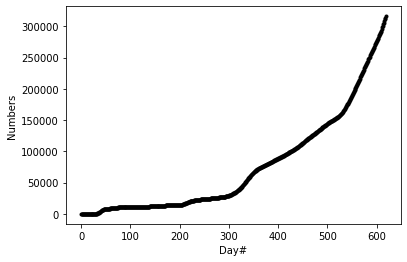

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
num_data=data.iloc[:, 2]
num_data = num_data.astype(float)

num_data.plot(style='k.',ylabel='Numbers',xlabel='Day#')
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from scipy.linalg import pinv2
num_data = np.array(num_data)
num_data = np.reshape(num_data, (-1, 1))
print(num_data.shape)

(619, 1)


In [27]:
m = 14
per = (1736 - m)/1826
size = int(len(num_data) * per)
d_train, d_test = num_data[0:size], num_data[size:len(num_data)]
mean_train = np.mean(d_train)
sd_train = np.std(d_train)
d_train = (d_train-mean_train)/sd_train
d_test = (d_test-mean_train)/sd_train

In [28]:
X_train = np.array([d_train[i][0] for i in range(m)])
y_train = np.array(d_train[m][0])
for i in range(1,(d_train.shape[0]-m)):
    l = np.array([d_train[j][0] for j in range(i,i+m)])
    X_train = np.vstack([X_train,l])
    y_train = np.vstack([y_train,d_train[i+m]])
X_test = np.array([d_test[i][0] for i in range(m)])
y_test = np.array(d_test[m][0])
for i in range(1,(d_test.shape[0]-m)):
    l = np.array([d_test[j][0] for j in range(i,i+m)])
    X_test = np.vstack([X_test,l])
    y_test = np.vstack([y_test,d_test[i+m]])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(569, 14)
(569, 1)
(22, 14)
(22, 1)


In [25]:
import scipy.stats as stats
input_size = X_train.shape[1]
hidden_size = 100   #no. of hidden neurons
mu, sigma = 0, 1
w_lo = -1 
w_hi = 1
b_lo = -1 
b_hi = 1
#initialising input weights and biases randomly drawn from a truncated normal distribution
input_weights = stats.truncnorm.rvs((w_lo - mu) / sigma, (w_hi - mu) / sigma, loc=mu, scale=sigma,size=[input_size,hidden_size])
biases = stats.truncnorm.rvs((b_lo - mu) / sigma, (b_hi - mu) / sigma, loc=mu, scale=sigma,size=[hidden_size])


def relu(x):      #hidden layer activation function
    return np.maximum(x, 0, x)

def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H
output_weights = np.dot(pinv2(hidden_nodes(X_train)), y_train)
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out
prediction = predict(X_test)

In [26]:
correct = 0
total = X_test.shape[0]
y_test = (y_test*sd_train) + mean_train
prediction = (prediction*sd_train) + mean_train
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(y_test, prediction))
print('Test RMSE: %.3f' % rmse)
mape_sum = 0
for i,j in zip(y_test,prediction):
    mape_sum = mape_sum + (abs((i-j)/i))
mape = (mape_sum/total)*100
mpe_sum = 0
for i,j in zip(y_test,prediction):
    mpe_sum = mpe_sum + ((i-j)/i)
mpe = (mpe_sum/total)*100
print('Test MAPE: %.3f' % mape)
print('Test MPE: %.3f' % mpe)

TypeError: ignored

Text(0, 0.5, 'Cummulative Numbers')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


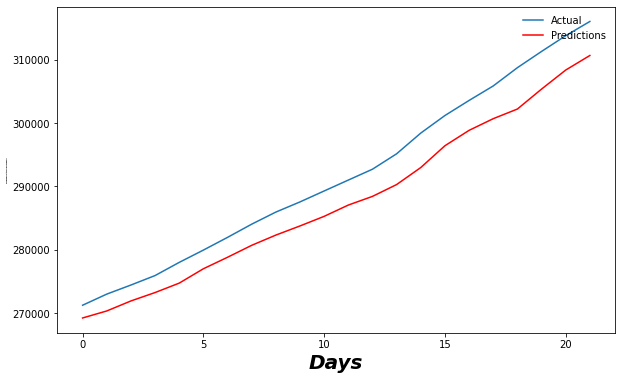

In [21]:
# plot forecasts against actual outcomes
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(y_test,label = 'Actual')
ax.plot(prediction, color='red',label = 'Predictions')
ax.legend(loc='upper right', frameon=False)
plt.xlabel('Days',fontname="Arial", fontsize=20, style='italic', fontweight='bold')
plt.ylabel('Cummulative Numbers',fontname="Arial", fontsize=2, style='italic', fontweight='bold')
